## 1- Exploratory Data Analysis (EDA) :
**OBJECTIF** : 
*   Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arrière).
*   Développer une première stratégie de modélisation.

**CHECKLIST DE BASE** : 

  **Analyse de forme** :

  * Variable target : SARS-Cov-2 exam result
  * Lignes et colonnes : (5644, 111)
  * Types de varibles : Quantitative =74, Qualitative=37
  * Analyse des valeurs manquantes :
   - beaucoup de NaN (moitié des variables > 90% de NaN)
    - 2 groupes de données 76% -> Test viral, 89% -> taux sanguins


  **Analyse de fond** : 

  * Visualisation de la target :  
   - 10% de cas positifs (558 / 5000)
  * Signification des variables : 
   -  variables continues standardisées, skewed (asymétriques), test sanguin
   - age quantile : difficile d'interpreter ce graphique, mais cela pourrait aussi etre une transformation mathématique. On ne peut pas savoir réellement car la personne qui a mit ce dataset ne le précise nul part. Mais ce n'est pas tres important.
   - variable qualitative : binaire (0, 1), viral, Rhinovirus qui semble tres élevée
  * Relation variables/target : 
   - target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester.
   - target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourrait etre intéressante pour la comparer avec les résultats de tests sanguins
   -  target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19.

**Analyse plus détaillée** : 


- **Relation Variables / Variables** :
    - blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)
    - blood_data / age : tres faible corrélation entre age et taux sanguins
    - viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
    - relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
    - relation hospitalisation / est malade : 
    - relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller


- **NaN analyse** : viral : 1350(92/8), blood : 600(87/13), both : 90

### **hypotheses nulle (H0)**: 

- Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
    - H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs

- Les individus atteints d'une quelconque maladie ont des taux significativement différents

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_row', 111)
#pd.set_option('display.max_column', 10)

In [3]:
data=pd.read_excel('dataset.xlsx')
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

### Analyse de la forme des données 

In [4]:
df=data.copy()

In [5]:
df.shape

(5644, 111)

In [6]:
df.dtypes #type de chaque variable

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [7]:
df.dtypes.value_counts() #Combien a t-on de variables dans chaque type

float64    70
object     37
int64       4
dtype: int64

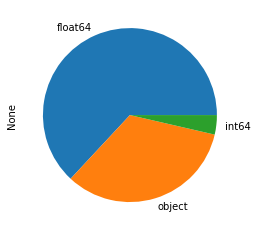

In [8]:
df.dtypes.value_counts().plot.pie()

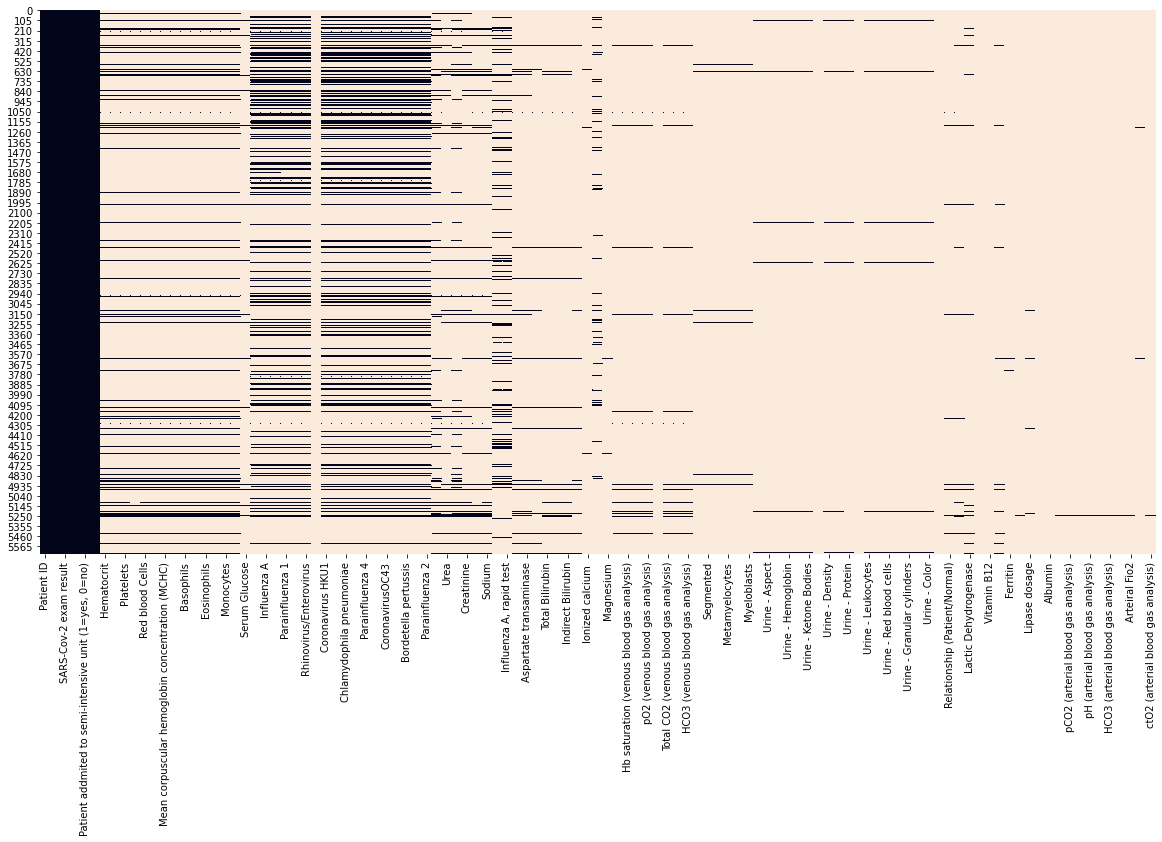

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [10]:
(df.isna().sum()/ df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Analyse de fond
1. Visualisation initiale- Élimination des colonnes inutiles.


In [11]:
df=df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...    Adenovirus  \
0         NaN        NaN                    NaN  ...           NaN   
1    -0.02234  -0.517413               0.010677  ...  not_detected   
2         NaN        NaN                    NaN  ...           NaN   
3         NaN        NaN                    NaN  ...           NaN   
4         NaN        NaN                    NaN  ...  not_detected   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test  
0                      NaN                      NaN  
1                 negative                 negative  
2                      NaN                      NaN  
3                      NaN                      NaN  
4                      NaN                      NaN  

[5 rows x 39 columns]

2.Examen de la colonne target

In [12]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True) #Classes Désequilibrée


negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

3.Histogrames des variables continues 

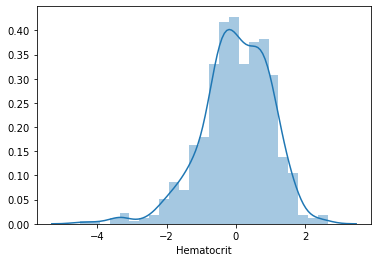

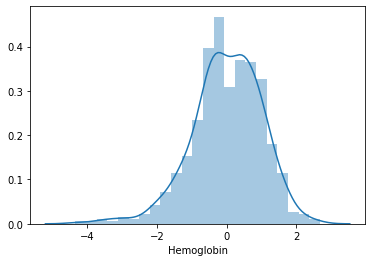

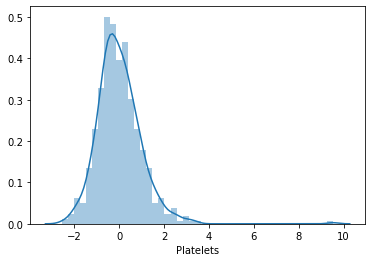

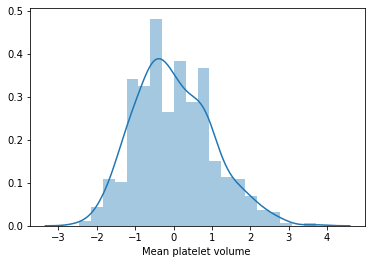

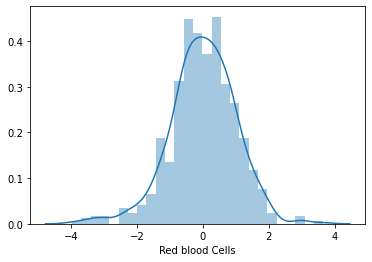

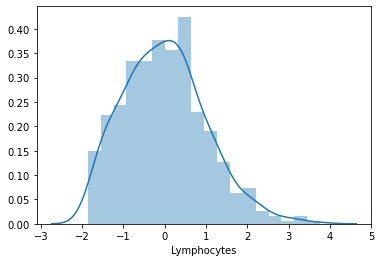

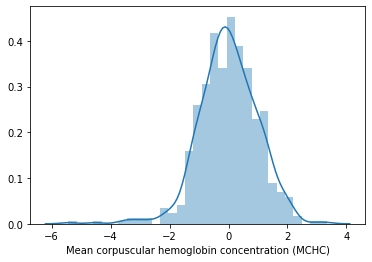

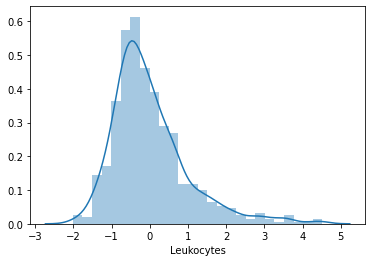

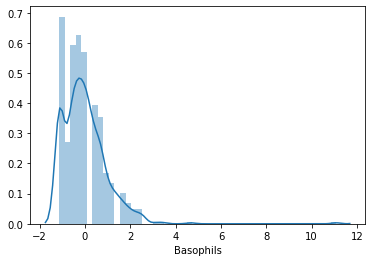

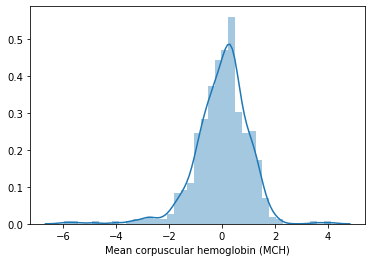

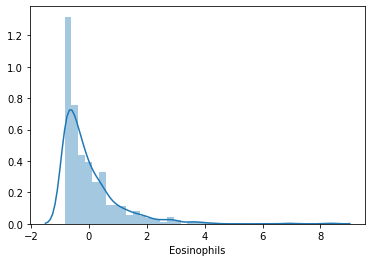

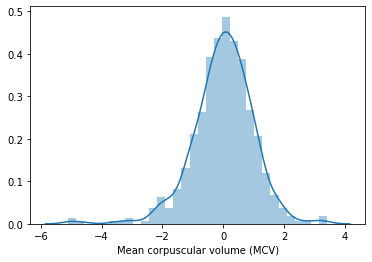

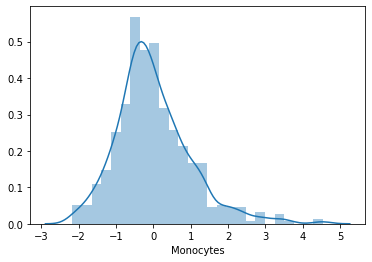

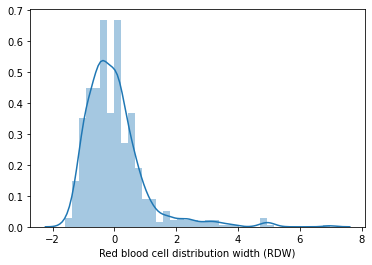

In [13]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[col])

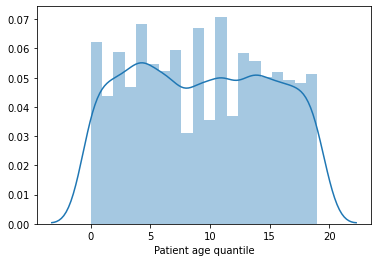

In [14]:
sns.distplot(df['Patient age quantile'], bins=20)

4.Variables qualitatives 

In [15]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [16]:
for col in df.select_dtypes('object'):
  print(f'{col :-<50} {df[col].unique()}')

Patient ID---------------------------------------- ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus--

C:\Users\18197\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


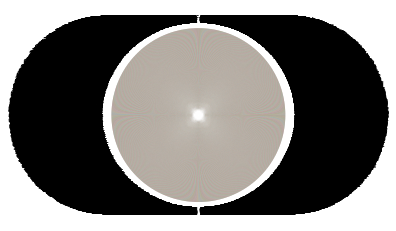

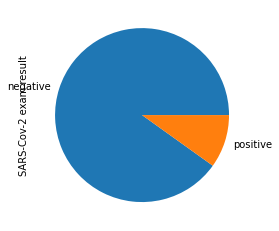

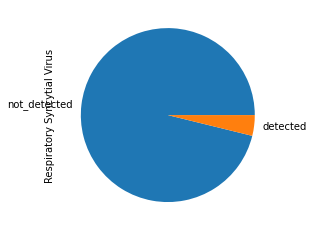

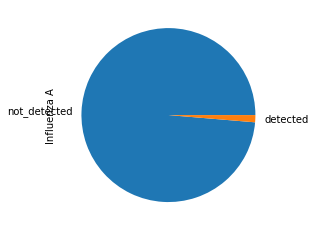

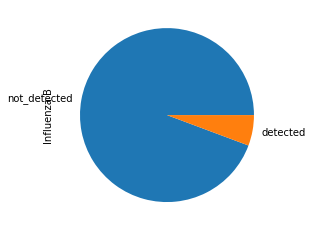

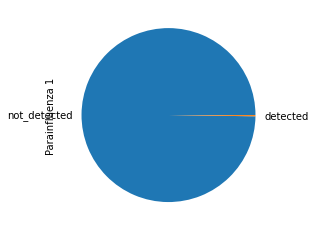

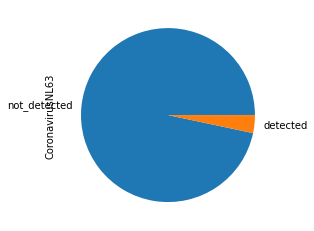

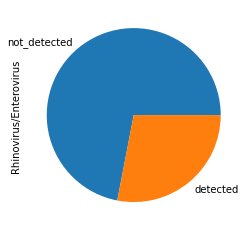

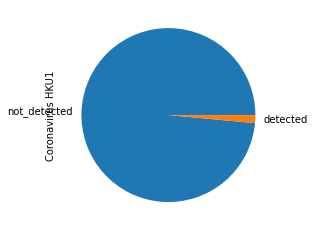

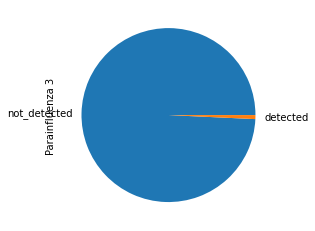

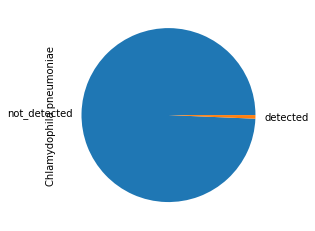

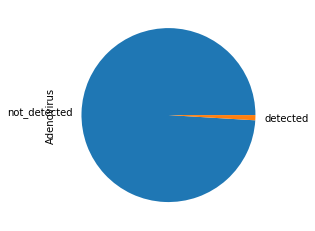

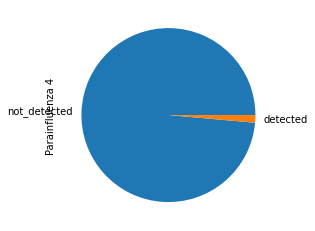

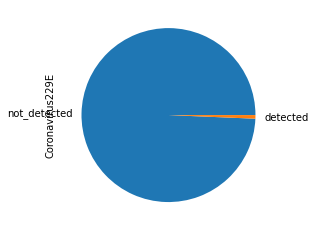

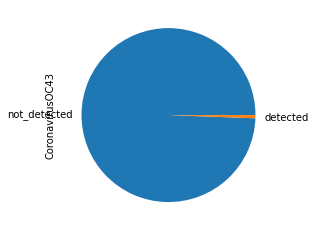

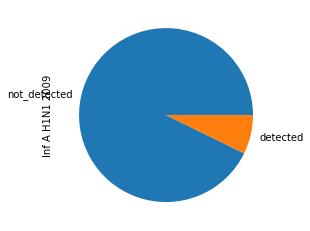

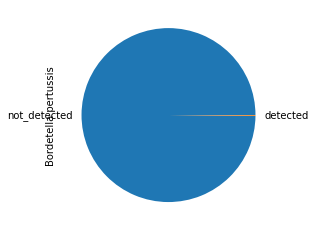

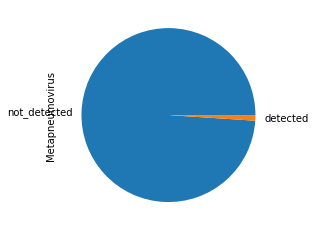

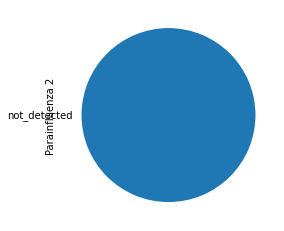

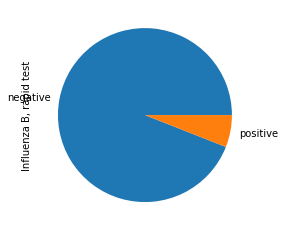

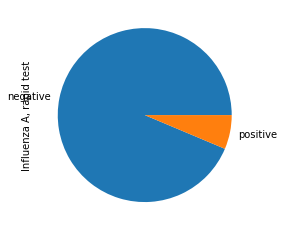

In [17]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()

5.Relation Target/ variables

Création de sous-ensemble positifs et négatifs 

In [18]:
positive_df=df[df['SARS-Cov-2 exam result']== 'positive'] 

In [19]:
negative_df=df[df['SARS-Cov-2 exam result']== 'negative'] 

Création des ensembles blood et viral

In [20]:
missing_rate=df.isna().sum()/df.shape[0]

In [21]:
blood_columns=df.columns[ (missing_rate <0.9) & (missing_rate> 0.88)]

In [22]:
viral_columns=df.columns[ (missing_rate <0.88) & (missing_rate> 0.75)]

Target/blood

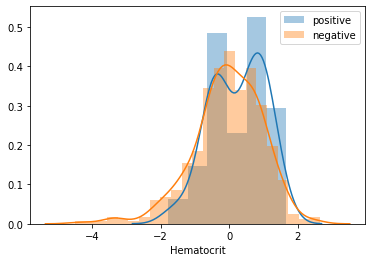

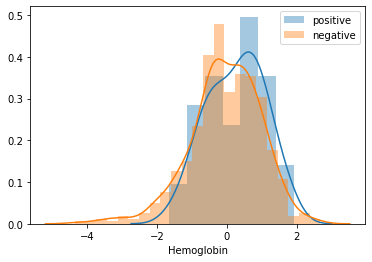

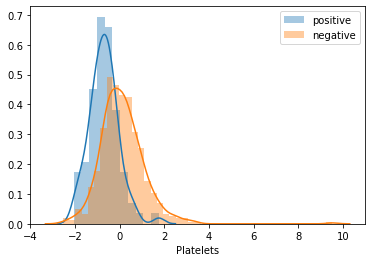

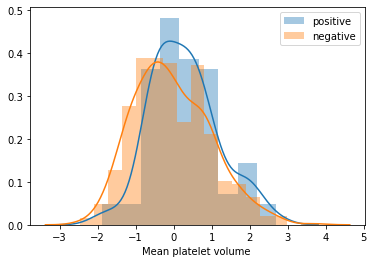

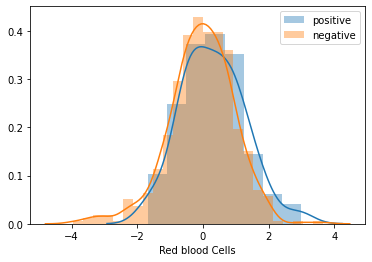

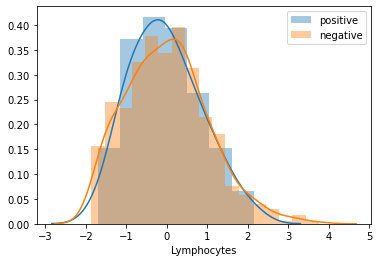

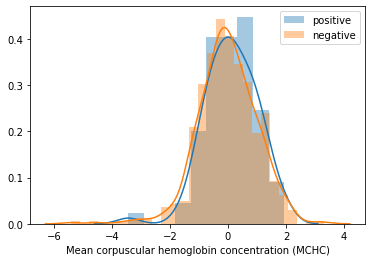

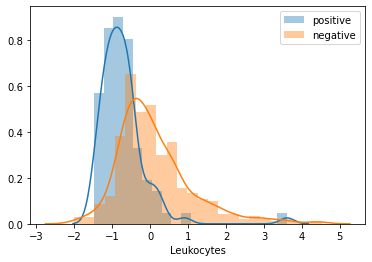

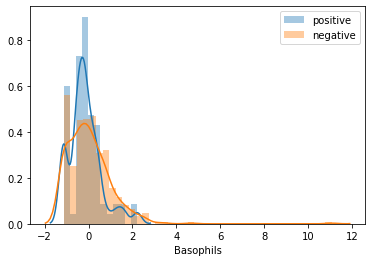

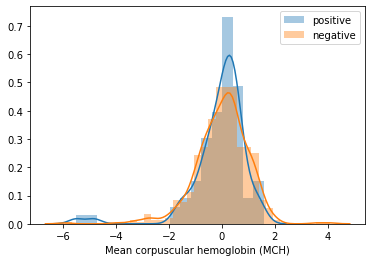

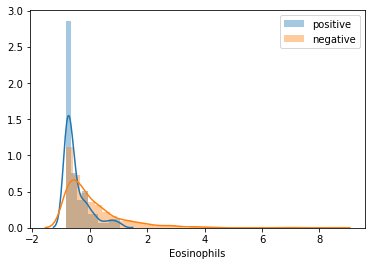

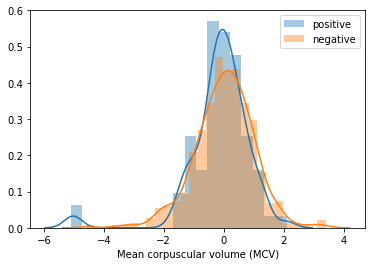

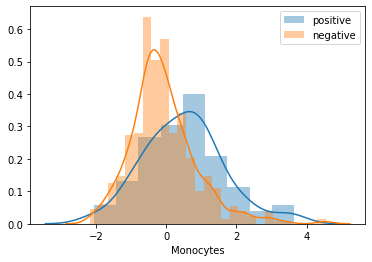

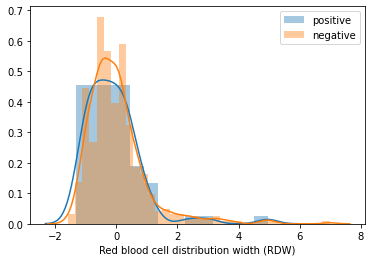

In [23]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

Relation Target/ Age 

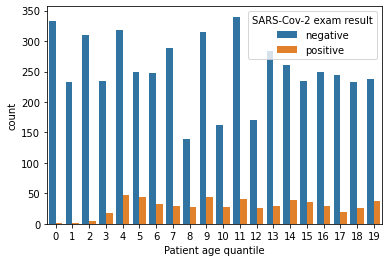

In [24]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

Relation Target/Viral (categorie- categorie)

In [25]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [26]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

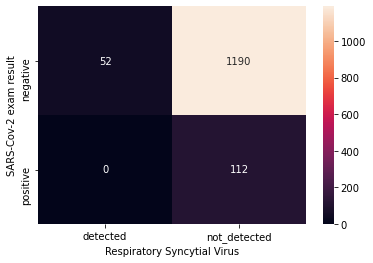

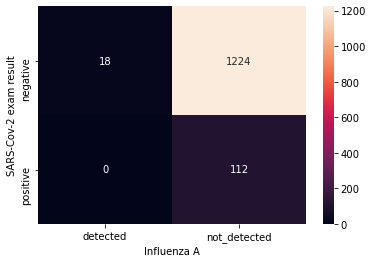

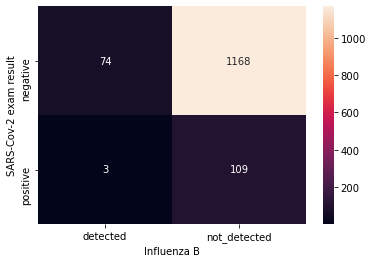

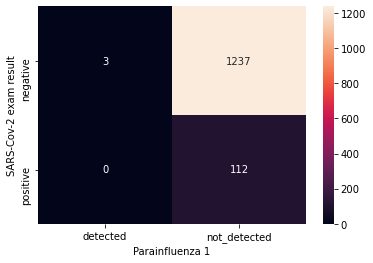

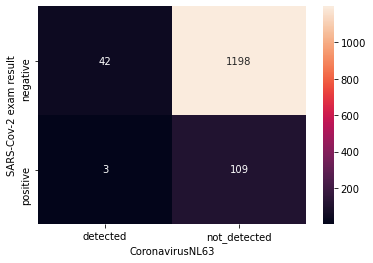

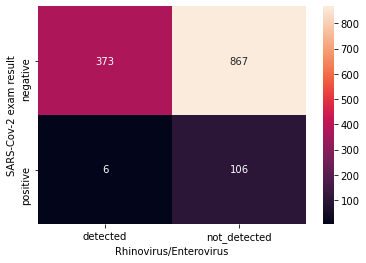

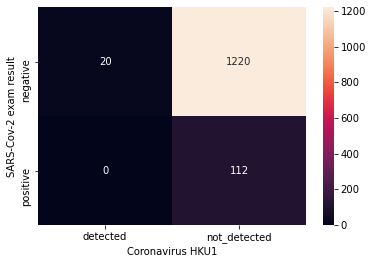

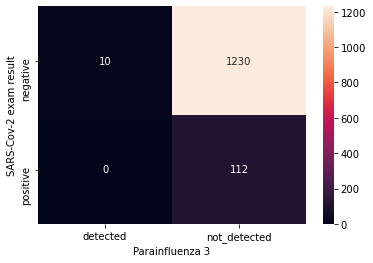

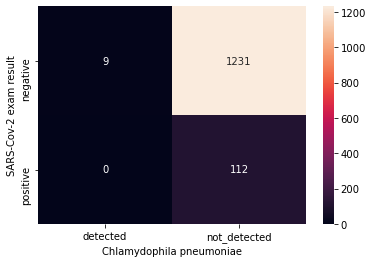

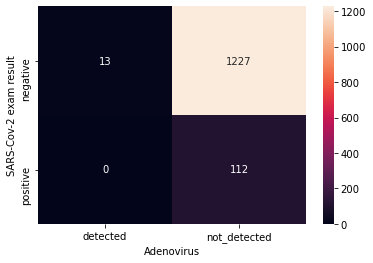

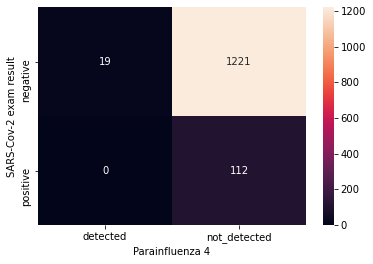

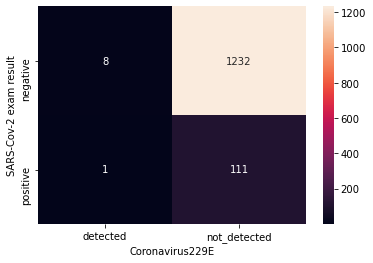

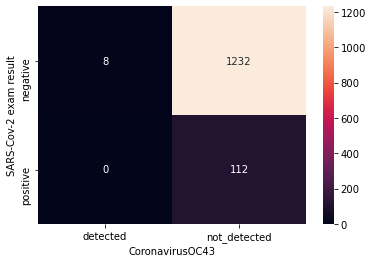

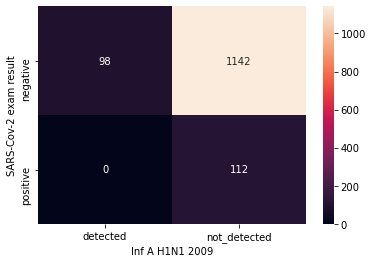

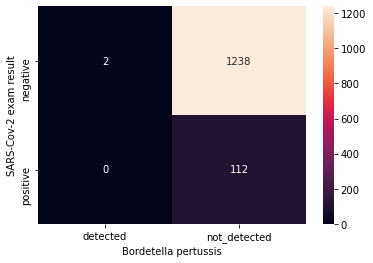

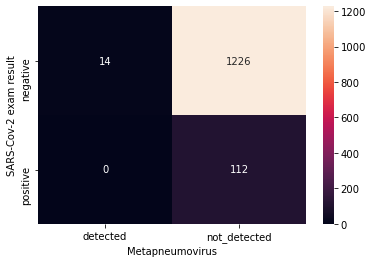

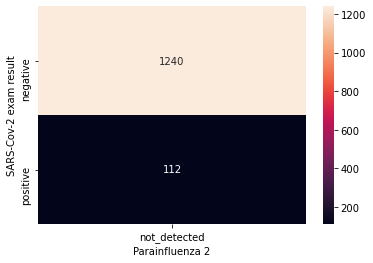

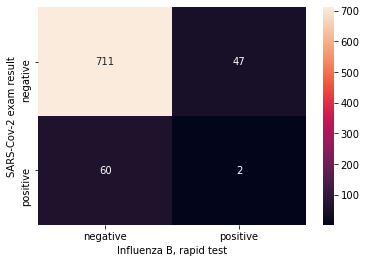

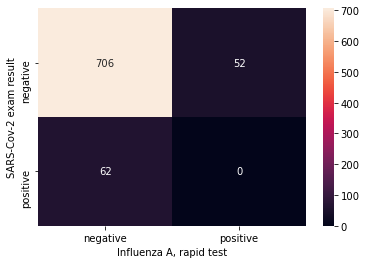

In [27]:
for col in viral_columns :
  plt.figure()
  sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]),annot=True, fmt='d')

#2-Analyse plus détaillée 

Relation variable/variable
1. Relations taux sanguin

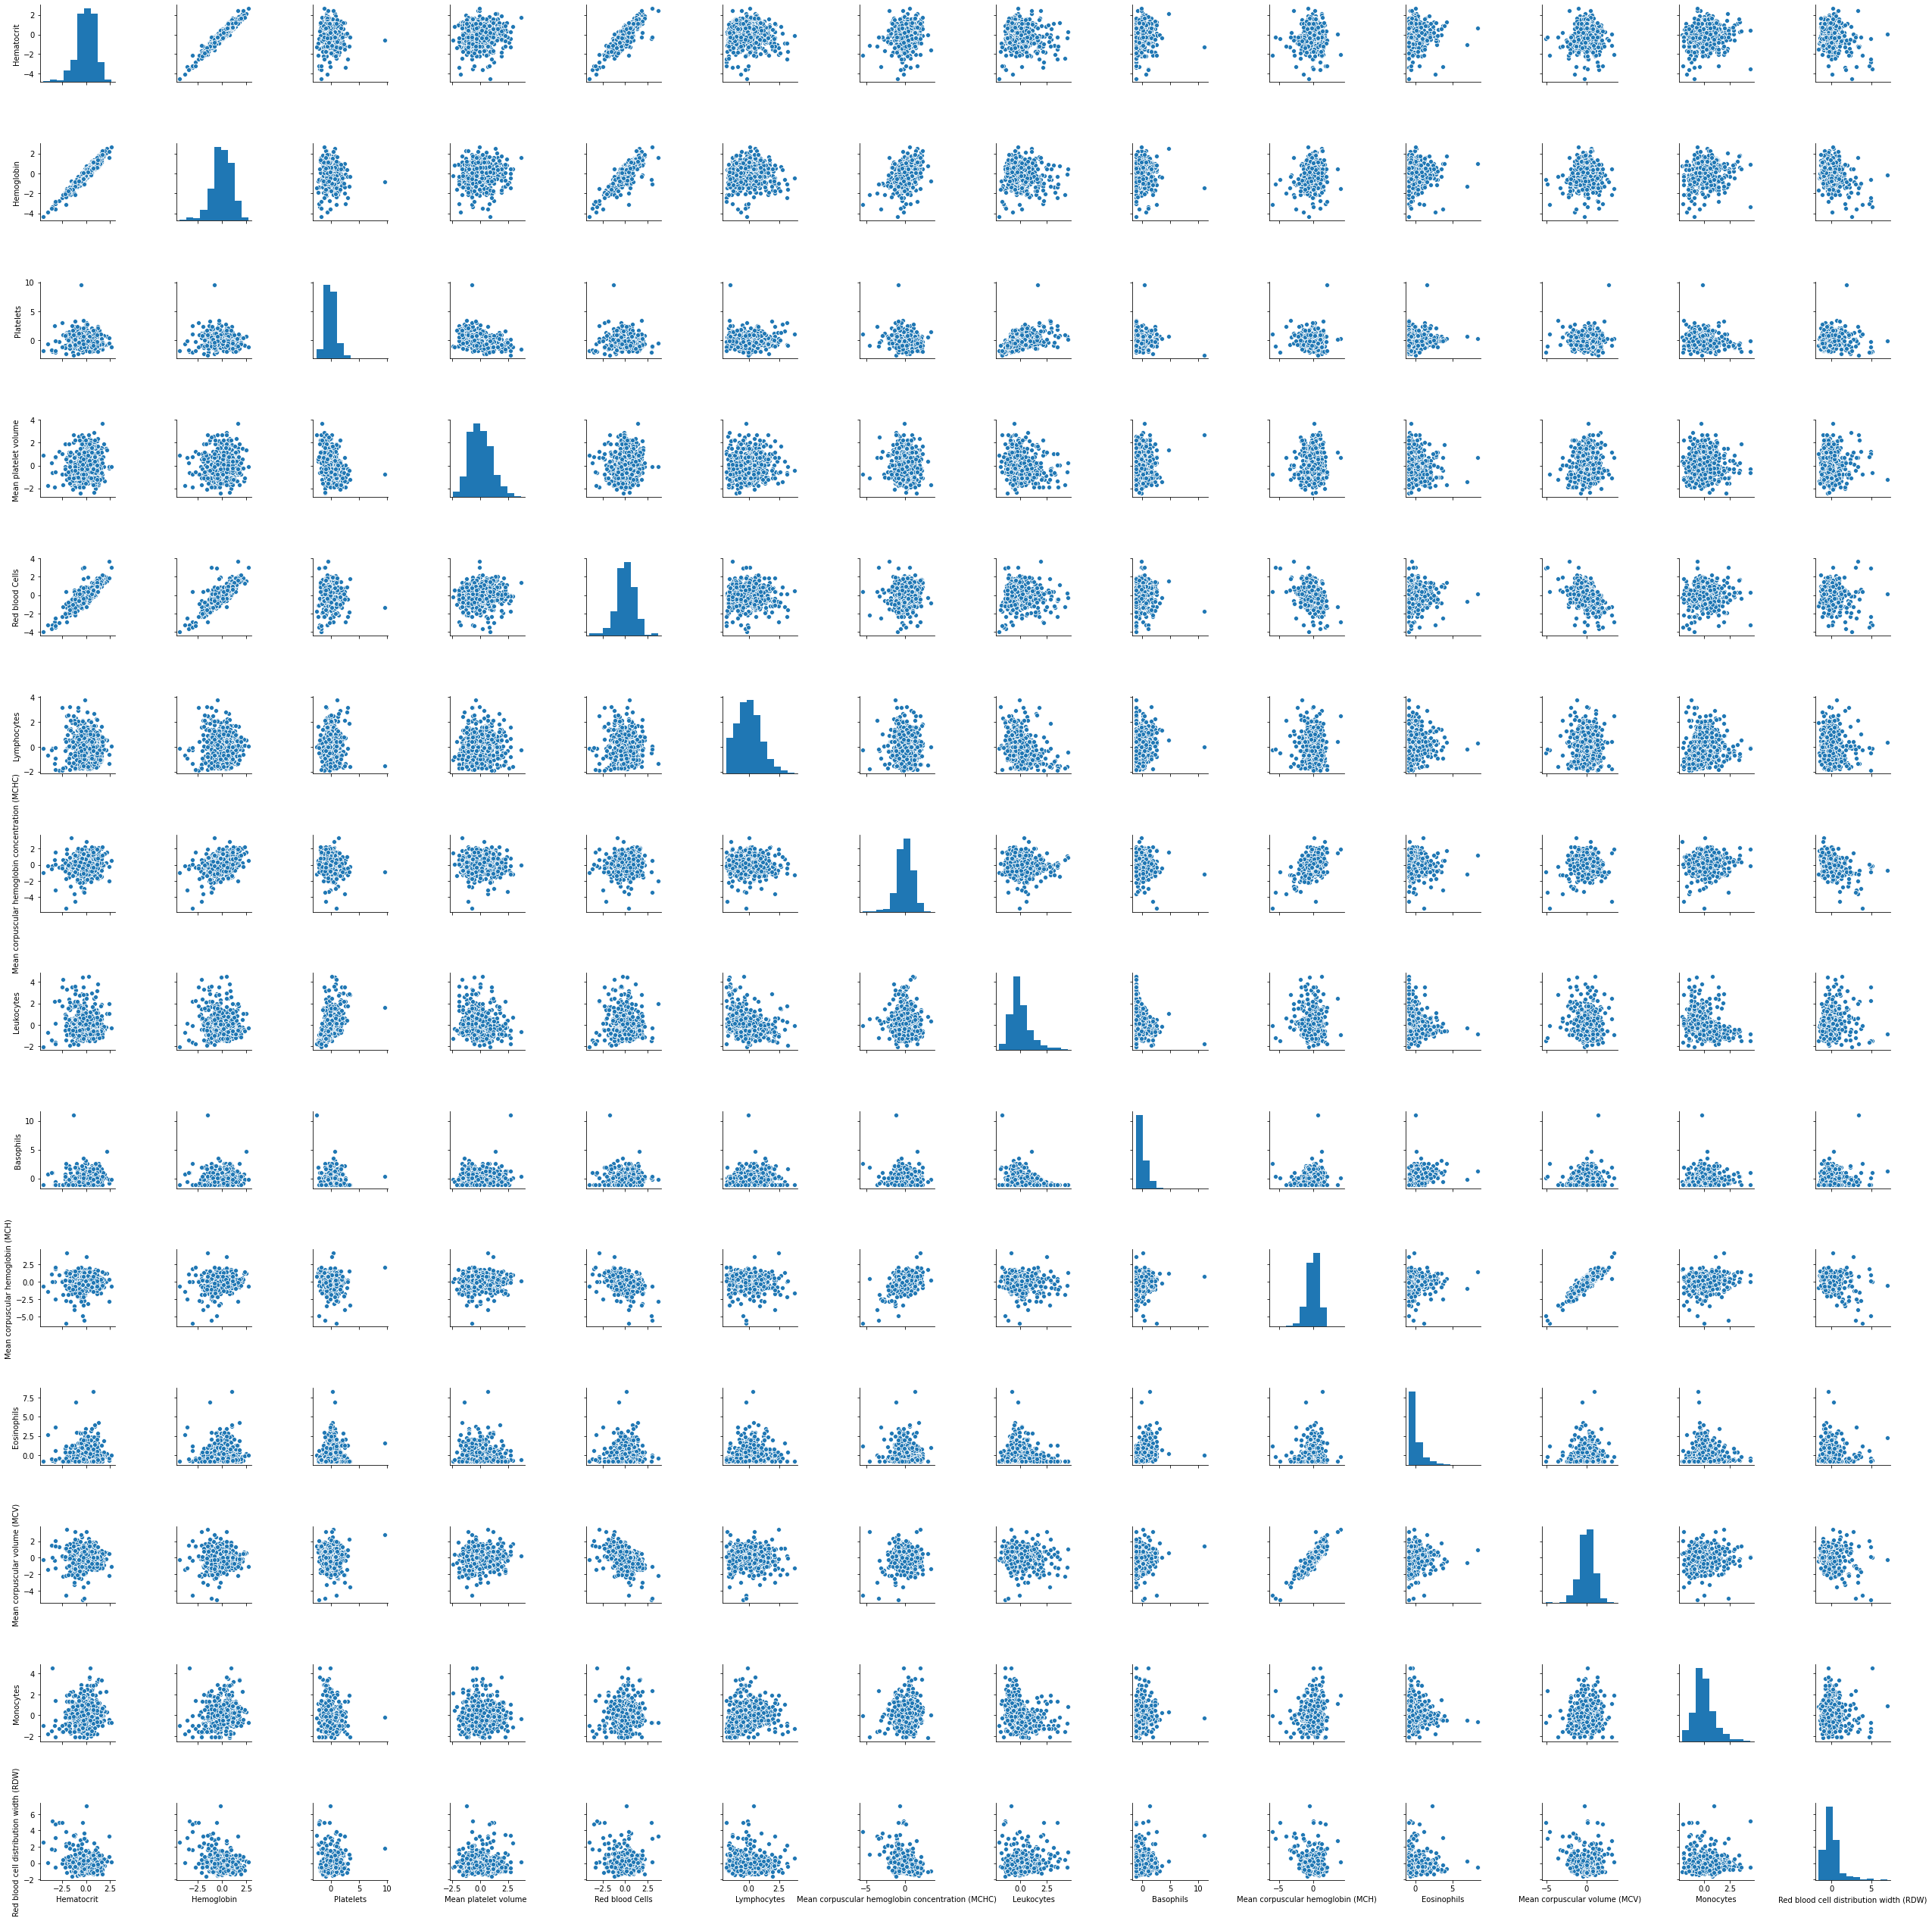

In [28]:
sns.pairplot(df[blood_columns])

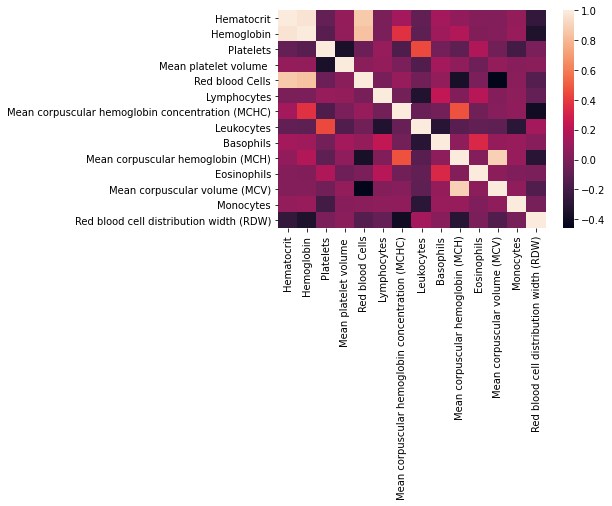

In [29]:
sns.heatmap(df[blood_columns].corr())

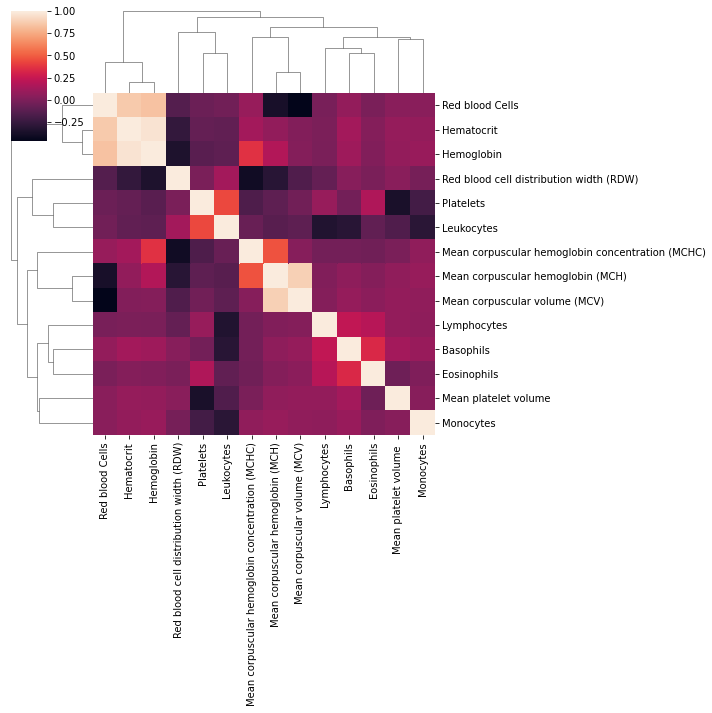

In [30]:
sns.clustermap(df[blood_columns].corr())

2. Relation Age/ Sang

C:\Users\18197\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\18197\Anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\18197\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To con

<Figure size 432x288 with 0 Axes>

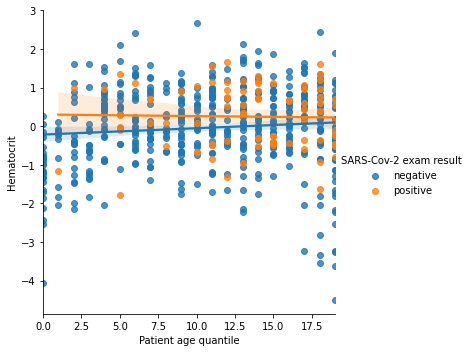

<Figure size 432x288 with 0 Axes>

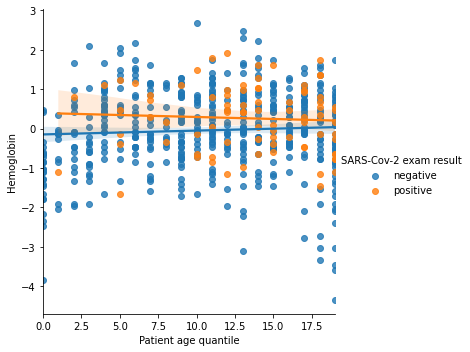

<Figure size 432x288 with 0 Axes>

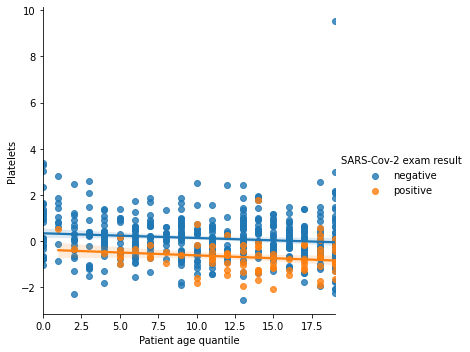

<Figure size 432x288 with 0 Axes>

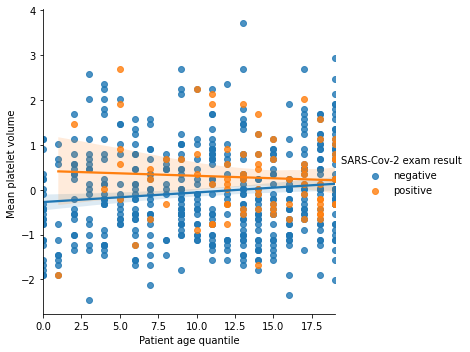

<Figure size 432x288 with 0 Axes>

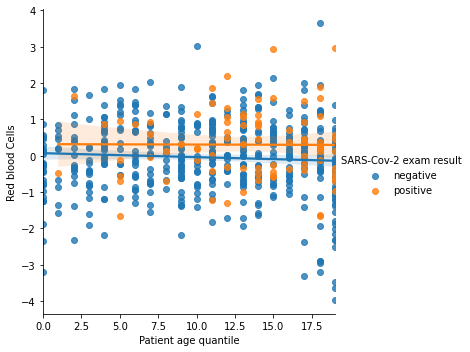

<Figure size 432x288 with 0 Axes>

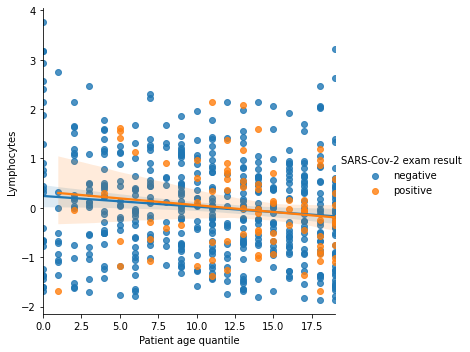

<Figure size 432x288 with 0 Axes>

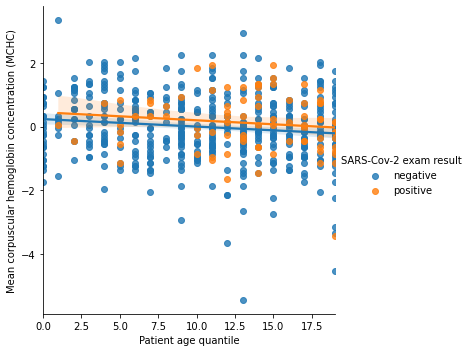

<Figure size 432x288 with 0 Axes>

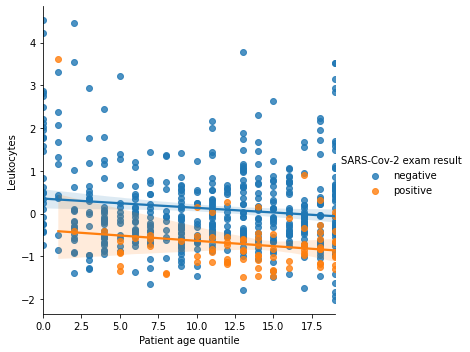

<Figure size 432x288 with 0 Axes>

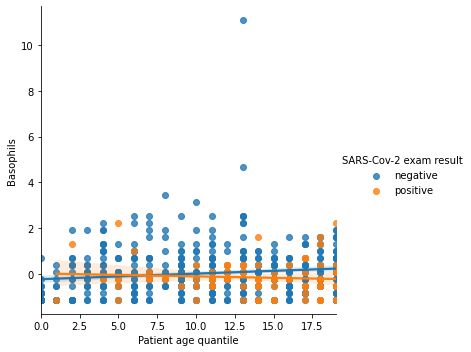

<Figure size 432x288 with 0 Axes>

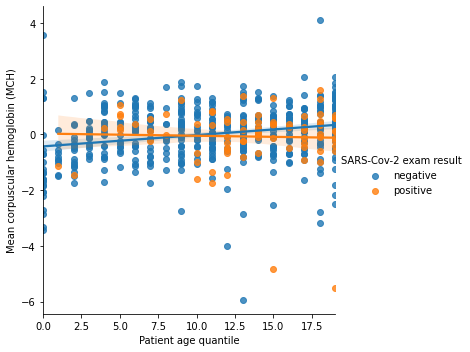

<Figure size 432x288 with 0 Axes>

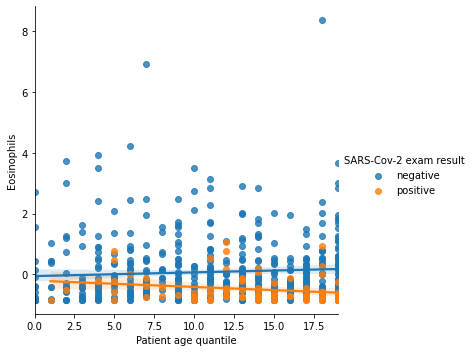

<Figure size 432x288 with 0 Axes>

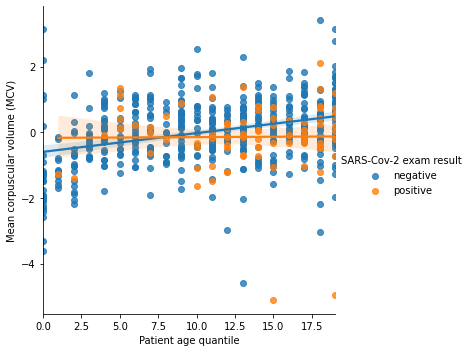

<Figure size 432x288 with 0 Axes>

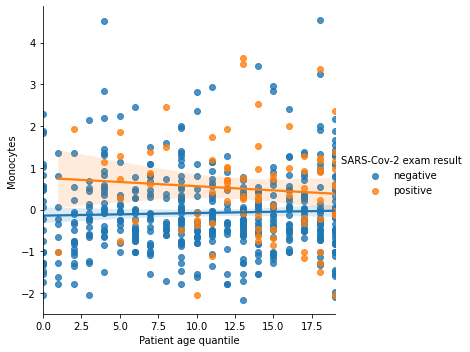

<Figure size 432x288 with 0 Axes>

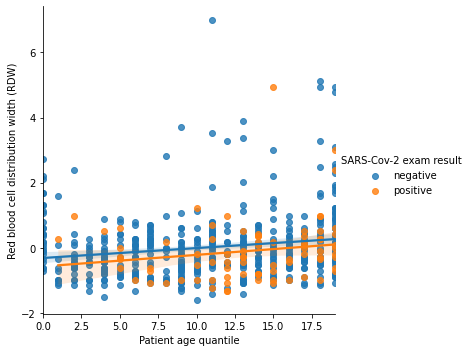

In [31]:
for col in blood_columns :
  plt.figure()
  sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df) #analyser des courbes de régression 

In [32]:
df.corr()['Patient age quantile'].sort_values(ascending=True)

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

3. Viral/Viral (Influenza et rapid test)

In [33]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])


Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [34]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

4. Relation Viral / Sanguin

In [35]:
df[viral_columns[:-2]] == 'detected'

Respiratory Syncytial Virus  Influenza A  Influenza B  Parainfluenza 1  \
0                           False        False        False            False   
1                           False        False        False            False   
2                           False        False        False            False   
3                           False        False        False            False   
4                           False        False        False            False   
...                           ...          ...          ...              ...   
5639                        False        False        False            False   
5640                        False        False        False            False   
5641                        False        False        False            False   
5642                        False        False        False            False   
5643                        False        False        False            False   

      CoronavirusNL63  Rhinovirus/Enterovirus  Coronavirus HKU1  \
0               False                   False             False   
1               False                    True             False   
2               False                   False             False   
3               False                   False             False   
4               False                    True             False   
...               ...                     ...               ...   
5639            False                   False             False   
5640            False                   False             False   
5641            False                   False             False   
5642            False                   False             False   
5643            False                   False             False   

      Parainfluenza 3  Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  \
0               False                     False       False            False   
1               False                     False       False            False   
2               False                     False       False            False   
3               False                     False       False            False   
4               False                     False       False            False   
...               ...                       ...         ...              ...   
5639            False                     False       False            False   
5640            False                     False       False            False   
5641            False                     False       False            False   
5642            False                     False       False            False   
5643            False                     False       False            False   

      Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0               False            False            False                 False   
1               False            False            False                 False   
2               False            False            False                 False   
3               False            False            False                 False   
4               False            False            False                 False   
...               ...              ...              ...                   ...   
5639            False            False            False                 False   
5640            False            False            False                 False   
5641            False            False            False                 False   
5642            False            False            False                 False   
5643            False            False            False                 False   

      Metapneumovirus  Parainfluenza 2  
0               False            False  
1               False            False  
2               False            False  
3               False            False  
4               False            False  
...               ...              ...  
5639            Fal

In [36]:
np.sum(df[viral_columns[:-2]] == 'detected', axis=0)

Respiratory Syncytial Virus     52
Influenza A                     18
Influenza B                     77
Parainfluenza 1                  3
CoronavirusNL63                 45
Rhinovirus/Enterovirus         379
Coronavirus HKU1                20
Parainfluenza 3                 10
Chlamydophila pneumoniae         9
Adenovirus                      13
Parainfluenza 4                 19
Coronavirus229E                  9
CoronavirusOC43                  8
Inf A H1N1 2009                 98
Bordetella pertussis             2
Metapneumovirus                 14
Parainfluenza 2                  0
dtype: int64

In [37]:
np.sum(df[viral_columns[:-2]] == 'detected', axis=1)

0       0
1       1
2       0
3       0
4       1
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Length: 5644, dtype: int64

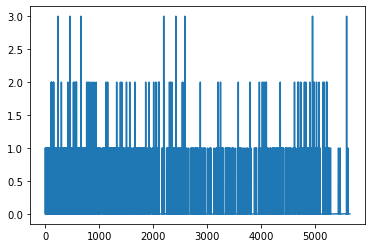

In [38]:
np.sum(df[viral_columns[:-2]] == 'detected', axis=1).plot()

In [39]:
df['est malade']= np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >= 1

In [40]:
malade_df=df[df['est malade']== True]
non_malade_df=df[df['est malade']== False]

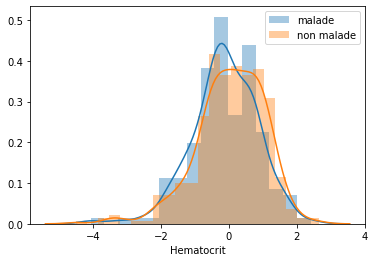

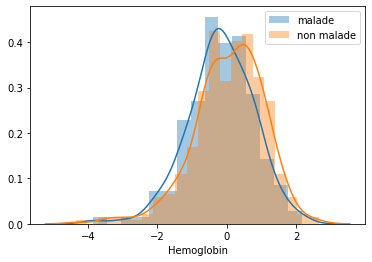

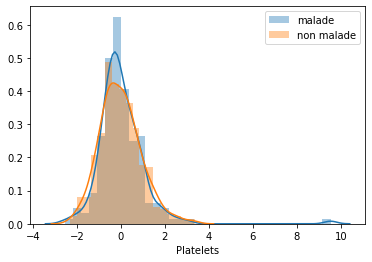

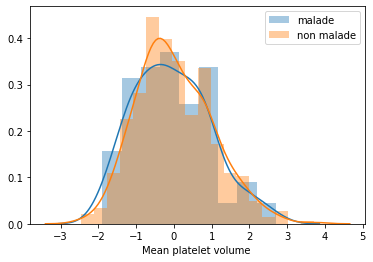

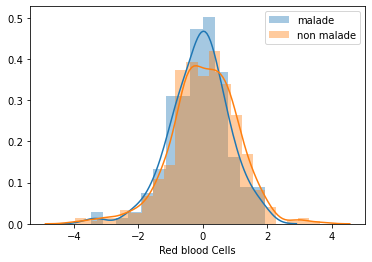

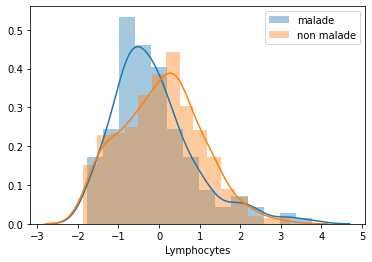

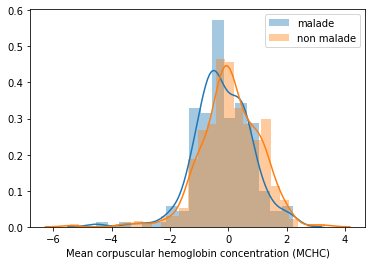

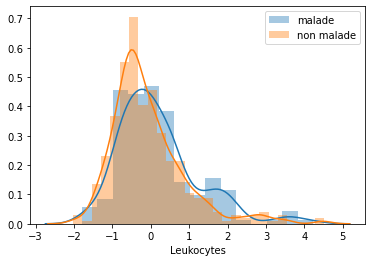

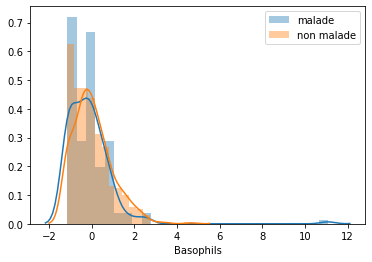

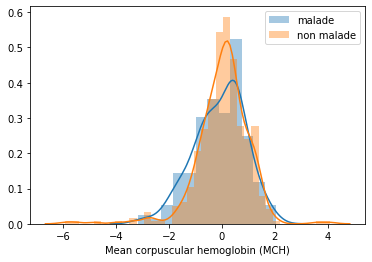

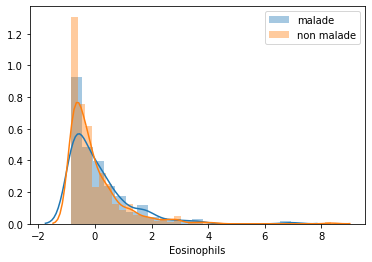

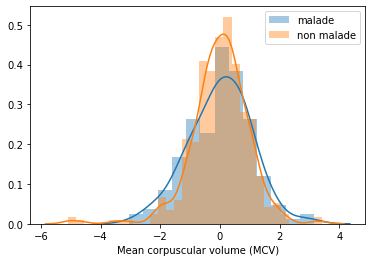

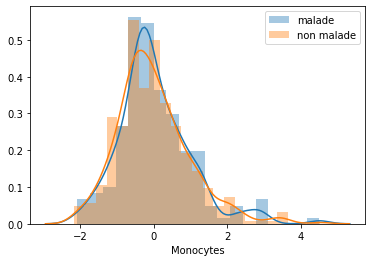

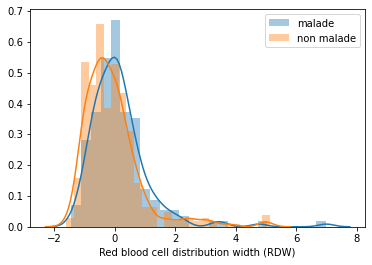

In [41]:
for col in blood_columns :
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

5. Relation Hospitalisation / est malade

In [42]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [43]:
df['statut']=df.apply(hospitalisation, axis=1) #on rajoute une colonne

In [44]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  Coronavirus229E  \
0         NaN        NaN                    NaN  ...              NaN   
1    -0.02234  -0.517413               0.010677  ...     not_detected   
2         NaN        NaN                    NaN  ...              NaN   
3         NaN        NaN                    NaN  ...              NaN   
4         NaN        NaN                    NaN  ...     not_detected   

   CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  \
0              NaN              NaN                   NaN              NaN   
1     not_detected     not_detected          not_detected     not_detected   
2              NaN              NaN                   NaN              NaN   
3              NaN              NaN                   NaN              NaN   
4     not_detected     not_detected          not_detected     not_detected   

   Parainfluenza 2  Influenza B, rapid test  Influenza A, rapid test  \
0              NaN                      NaN                      NaN   
1     not_detected                 negative                 negative   
2              NaN                      NaN                      NaN   
3              NaN                      NaN                      NaN   
4     not_detected                      NaN                      NaN   

   est malade   statut  
0       False  inconnu  
1        True  inconnu  
2       False  inconnu  
3       False  inconnu  
4        True  inconnu  

[5 rows x 41 columns]

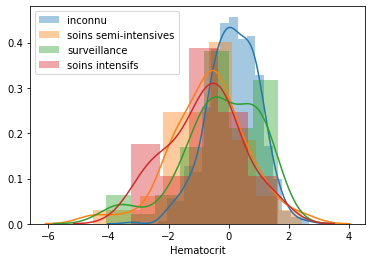

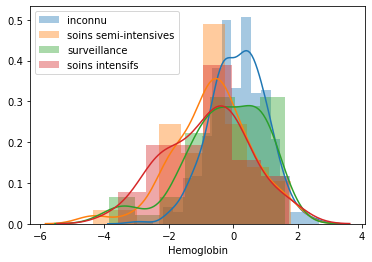

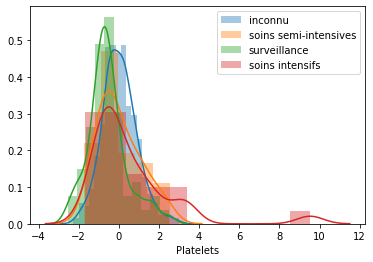

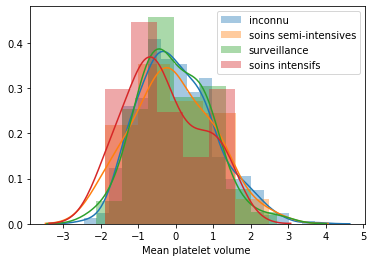

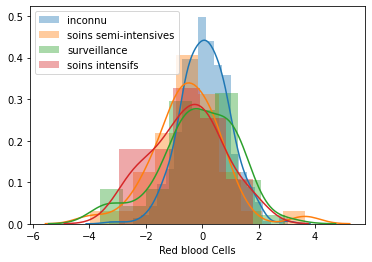

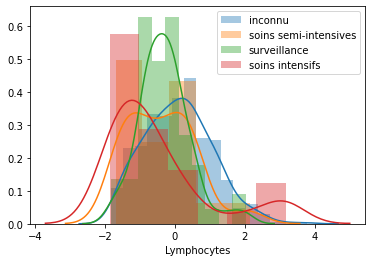

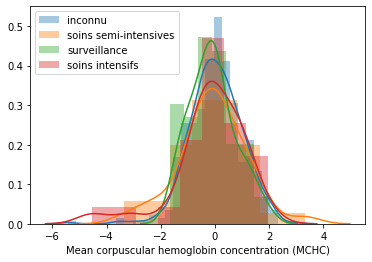

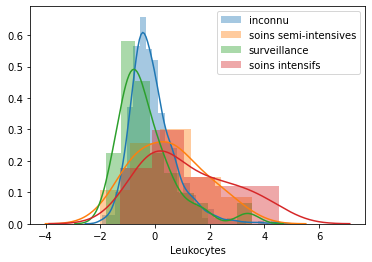

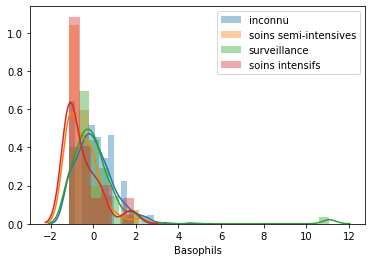

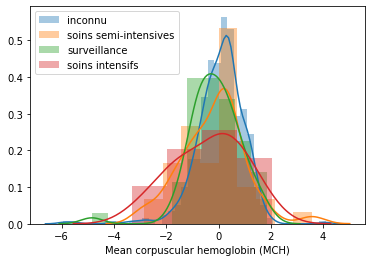

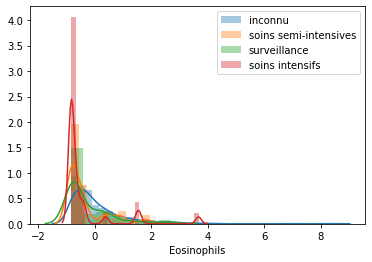

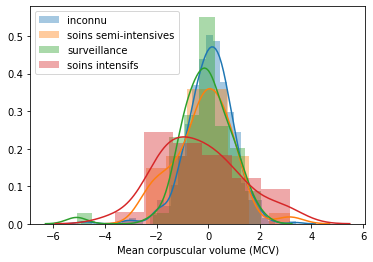

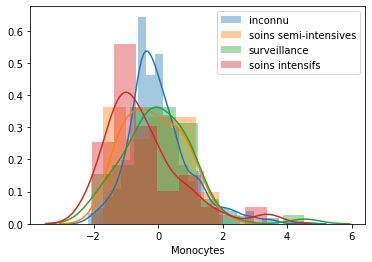

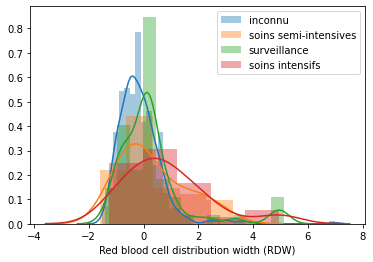

In [45]:
for col in blood_columns :
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']== cat][col], label=cat)
    plt.legend()

### Nan Analyse

In [46]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [47]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [48]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [49]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [50]:
df1=df[viral_columns[:-2]]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\18197\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [51]:
df2=df[blood_columns]
df2['covid']=df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\18197\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

### T-test
Il permet de vérifier si la moyenne de deux distributions est différente. Le principe est d'essayer de rejeter cette hypothese. 

In [52]:
from scipy.stats import ttest_ind

In [53]:
#Il est préférable d'avoir des classes balancées 

In [54]:
positive_df.shape

(558, 39)

In [55]:
negative_df.shape

(5086, 39)

In [56]:
balanced_ned=negative_df.sample(positive_df.shape[0])

In [57]:
def t_test(col):
    alpha=0.02
    stat, p= ttest_ind(balanced_ned [col].dropna(),positive_df[col].dropna())
    if p < alpha :
        return 'H0 rejetée'
    else :
        return 0

In [58]:
for col in blood_columns :
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- H0 rejetée
Hemoglobin---------------------------------------- H0 rejetée
Platelets----------------------------------------- H0 rejetée
Mean platelet volume ----------------------------- H0 rejetée
Red blood Cells----------------------------------- H0 rejetée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejetée
Red blood cell distribution width (RDW)----------- 0


## 2- Pre-processing :
 
**Objectifs** : 

1- Mettre les données dans un format propice au ML (Train/Test, Encodage, Nettoyage des Nan) -> premier modele : évaluation-diagnostique apres si le model est en :
  - underfitting : polynomial feautures, feature enginiring, modele plus complexe.
  - overfitting : imputation/filna, selectfrommodel, regularisation

2- Améliorer la performace du modéle (Feature Selection, Feature Enginiring, Feature Scaling, Suppression des Outliers)

In [97]:
df0=data.copy()

In [98]:
df0.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [99]:
missing_rate=df0.isna().sum()/df0.shape[0]

In [100]:
blood_columns0=list(df0.columns[(missing_rate <0.9) &(missing_rate >0.88) ])
viral_columns0=list(df0.columns[(missing_rate<0.88) & (missing_rate>0.75) ])

In [101]:
viral_columns0=viral_columns0[:-2]

In [102]:
key_columns=['Patient age quantile', 'SARS-Cov-2 exam result']

In [103]:
df0=df0[key_columns + blood_columns0+ viral_columns0]
df0.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                               NaN         NaN  ...   
1                                          -0.95079    -0.09461  ...   
2                                               NaN         NaN  ...   
3                                               NaN         NaN  ...   
4                                               NaN         NaN  ...   

   Parainfluenza 3  Chlamydophila pneumoniae    Adenovirus  Parainfluenza 4  \
0              NaN                       NaN           NaN              NaN   
1     not_detected              not_detected  not_detected     not_detected   
2              NaN                       NaN           NaN              NaN   
3              NaN                       NaN           NaN              NaN   
4     not_detected              not_detected  not_detected     not_detected   

   Coronavirus229E  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis  \
0              NaN              NaN             NaN                  NaN   
1     not_detected     not_detected    not_detected         not_detected   
2              NaN              NaN             NaN                  NaN   
3              NaN              NaN             NaN                  NaN   
4     not_detected     not_detected    not_detected         not_detected   

  Metapneumovirus Parainfluenza 2  
0             NaN             NaN  
1    not_detected    not_detected  
2             NaN             NaN  
3             NaN             NaN  
4    not_detected    not_detected  

[5 rows x 33 columns]

### Train/test - Encodage - Nettoyage

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
trainset, testset= train_test_split(df0,test_size=0.2, random_state=0)

In [106]:
trainset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.900997
positive    0.099003
Name: SARS-Cov-2 exam result, dtype: float64

In [107]:
testset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901683
positive    0.098317
Name: SARS-Cov-2 exam result, dtype: float64

### Encodage

In [88]:
code= {
    'positive' :1,
    'negative' :0,
    'detected' :1,
    'not_detected':0,
}

In [89]:
for col in df0.select_dtypes('object'):
    df0[col]=df0[col].map(code)

In [90]:
df0.head()

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13                       0         NaN         NaN   
1                    17                       0    0.236515    -0.02234   
2                     8                       0         NaN         NaN   
3                     5                       0         NaN         NaN   
4                    15                       0         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                               NaN         NaN  ...   
1                                          -0.95079    -0.09461  ...   
2                                               NaN         NaN  ...   
3                                               NaN         NaN  ...   
4                                               NaN         NaN  ...   

   Rhinovirus/Enterovirus  Coronavirus HKU1  Parainfluenza 3  \
0                     NaN               NaN              NaN   
1                     1.0               0.0              0.0   
2                     NaN               NaN              NaN   
3                     NaN               NaN              NaN   
4                     1.0               0.0              0.0   

   Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  Coronavirus229E  \
0                       NaN         NaN              NaN              NaN   
1                       0.0         0.0              0.0              0.0   
2                       NaN         NaN              NaN              NaN   
3                       NaN         NaN              NaN              NaN   
4                       0.0         0.0              0.0              0.0   

   CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  
0              NaN              NaN                   NaN  
1              0.0              0.0                   0.0  
2              NaN              NaN                   NaN  
3              NaN              NaN                   NaN  
4              0.0              0.0                   0.0  

[5 rows x 31 columns]

In [91]:
df0.dtypes.value_counts()

float64    29
int64       2
dtype: int64

In [108]:
def encodage(df0):
    code= {
    'positive' :1,
    'negative' :0,
    'detected' :1,
    'not_detected':0}
    for col in df0.select_dtypes('object'):
        df0.loc[:,col]=df0[col].map(code)
    return df0

In [109]:
def feature_engineering(df0):
    df0['est malade'] = df0[viral_columns0].sum(axis=1) >= 1
    df0 = df0.drop(viral_columns0, axis=1)
    return df0

In [110]:
def imputation(df0):
    return df0.dropna(axis=0)

In [111]:
def preprocessing(df0):
    
    df0 = encodage(df0)
    df0 = feature_engineering(df0)
    df0 = imputation(df0)
    
    X = df0.drop('SARS-Cov-2 exam result', axis=1)
    y = df0['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [112]:
X_train, y_train=preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\18197\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\18197\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
X_test, y_test=preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\18197\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Modélisation

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
model=DecisionTreeClassifier(random_state=0)

### Procédure d'évaluation 

In [116]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [117]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred=model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score=learning_curve(model,X_train, y_train, cv=4,train_sizes=np.linspace(0.1,1,10), scoring='f1')#elle utilise la cross val
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train socre')
    plt.plot(N, val_score.mean(axis=1),label='validation')
    plt.legend()

[[86  9]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.44      0.44      0.44        16

    accuracy                           0.84       111
   macro avg       0.67      0.67      0.67       111
weighted avg       0.84      0.84      0.84       111



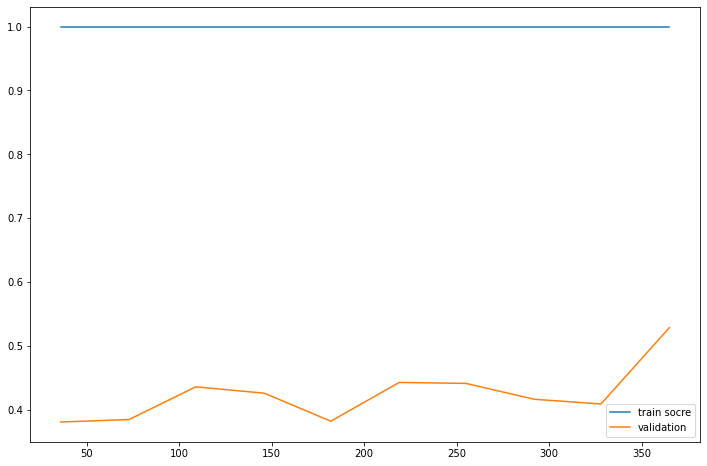

In [118]:
evaluation(model)

**REMARQUE** : Le modele est en overtifiting. Je vais reproduire l'imputation en faisant un fillna et revoir les résultats

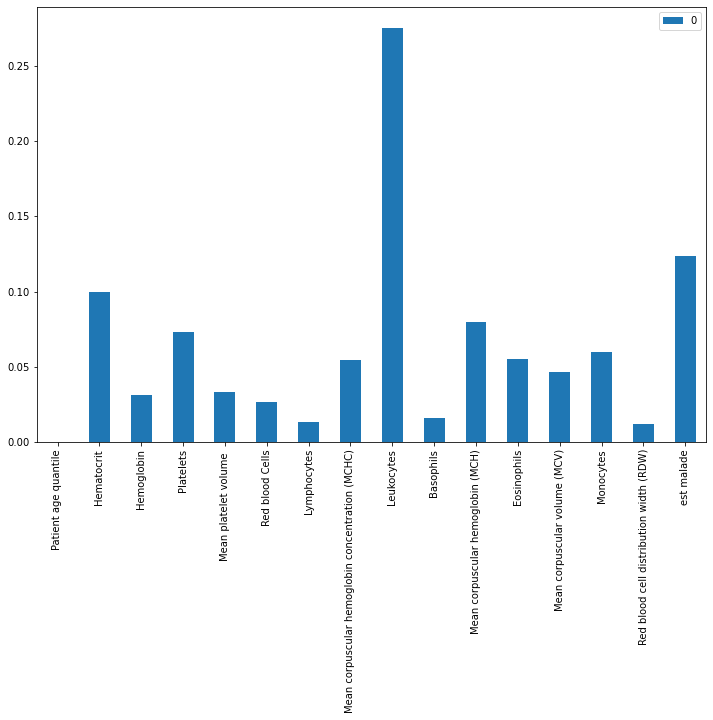

In [119]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

**REMARQUE** : On remarque que les variables les plus importantes sont celles en relation avec les tests sanguins (blood_columns)

In [120]:
from sklearn.ensemble import RandomForestClassifier


In [121]:
model_1=RandomForestClassifier(random_state=0)

In [124]:
def evaluation(model_1):
    model_1.fit(X_train, y_train)
    ypred=model_1.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score=learning_curve(model_1,X_train, y_train, cv=4,train_sizes=np.linspace(0.1,1,10), scoring='f1')#elle utilise la cross val
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train socre')
    plt.plot(N, val_score.mean(axis=1),label='validation')
    plt.legend()

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



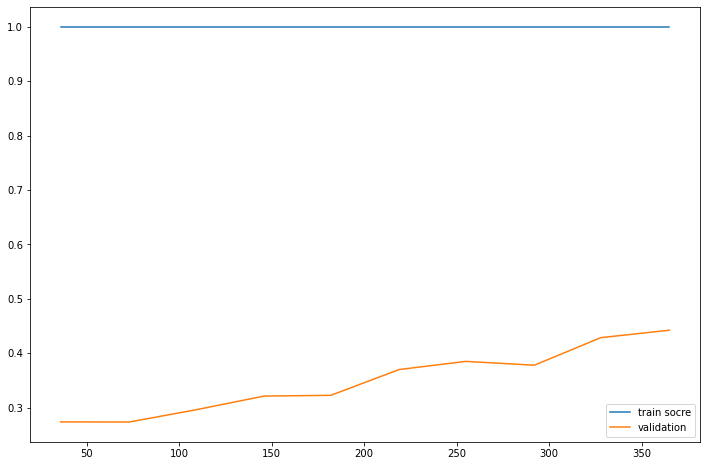

In [125]:
evaluation(model_1)

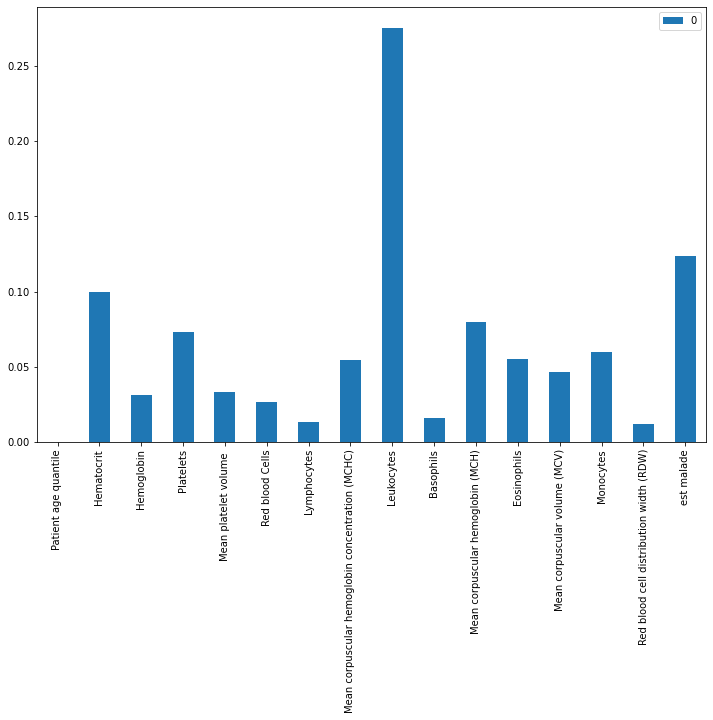

In [126]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [143]:
model_2=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=12),RandomForestClassifier(random_state=0))

In [144]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111



C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\18197\Anacond

C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\18197\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\18197\Anacond

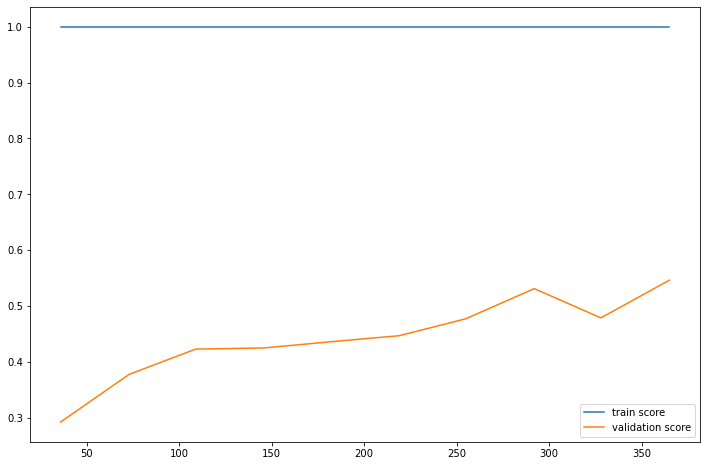

In [145]:
evaluation(model_2)